# Lec 11.2 Machine learning

# Introduction

Machine Learning has emerged as an important tool accross the scientific diciplines and in many business applications. We allready have encountered machine learning in linear regression using scikitlearn, where we split the data into a training set and a prediction set, a very common methodology in machine learning.

The most commonly used package for machine learning is scikit-learn, which we will play around with this week.

There are a number of types of machine learning algorithms, aka "estimators". A useful flowchart:
https://scikit-learn.org/stable/tutorial/machine_learning_map/

These can be divided up into:

1) Regression, which we did with line fitting. This involves finding the best fit parameters for some model.

2) Clustering, which groups data by some similarity criterion (e.g., these data points are grass, these are trees, and these are water because of their spectral data differences). See https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

3) Dimensionality reduction, which breaks data, often timesries data, into principle components. For example if we were looking at a temperature timeseries, we might get as components an annual cycle, a daily cycle, and a multi-year cycle corresponding to ENSO (El Nino - Southern Oscillation), etc.

4) Classification. This uses labeled data to make preditions about what will happen in places you don't have data, for example in this area it is expected to see large green birds and not small red birds, and in another area it is expected to see both types. We will focus on this today.

See also: https://scikit-learn.org/stable/tutorial/basic/tutorial.html


# Classification example from scikit-learn
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Here is the whole code below. We are going to break this example down

C:\Users\Sandra\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Sandra\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Sandra\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


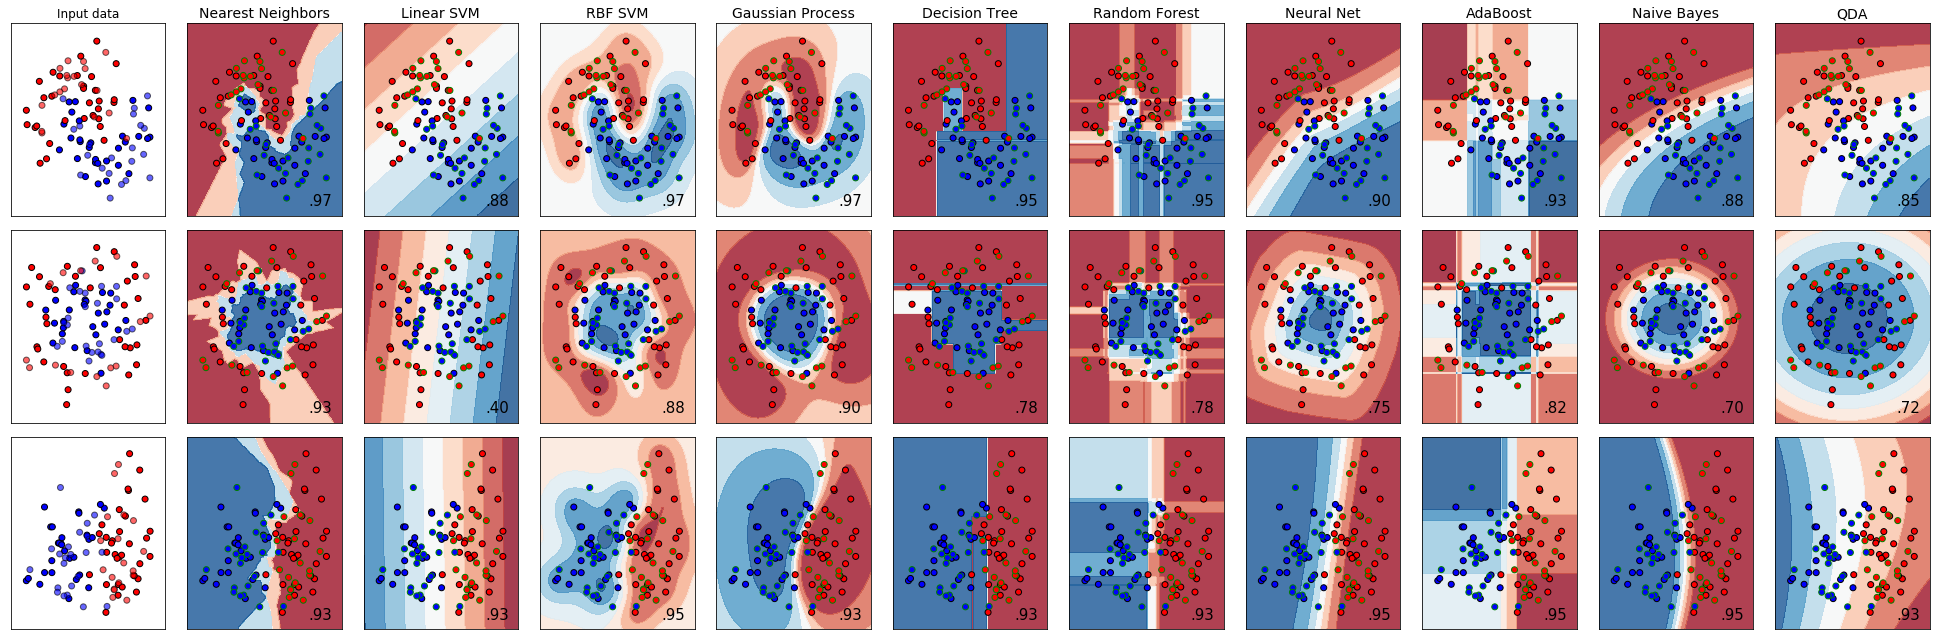

In [2]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9), facecolor = 'w')
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='green', alpha=1, zorder = 10)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize = 14)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

## Load all of the packages in

Note they do this for each package separately

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# data and pre-proccessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# all the classifiers we will use:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [4]:
h = .02  # step size in the mesh

# create a string list of all the cassifier names
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [5]:
# create a function list of all the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

## Part 1: Make some datasets to classify

The example uses three types of data, linearly separable, moons and circles

### D1. Linearly separable (side by side data)

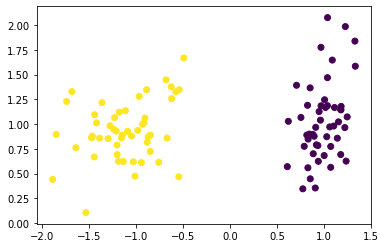

In [6]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0],X[:,1], c= y)

In [7]:
# add som noise to these so they smoosh together
X_old = np.copy(X)
# make a random number object
rng = np.random.RandomState(2)
# add some random numbers to the data
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

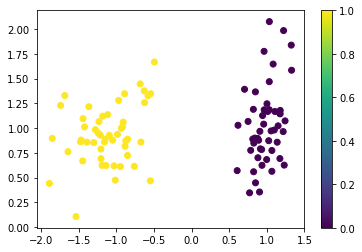

In [8]:
plt.scatter(X_old[:,0],X_old[:,1], c = y)
plt.colorbar()

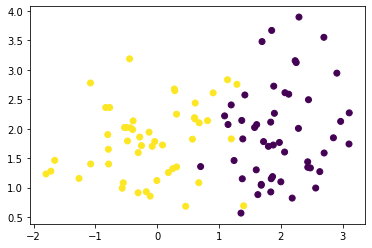

In [9]:
plt.scatter(X[:,0],X[:,1], c = y)

### E1. What happens if you use X_old = X instead of X_old = np.copy(X)?

In [10]:
# add som noise to these so they smoosh together #using x_old=x instead of x_old=np.copy(X) 
X_old = X
# make a random number object
rng = np.random.RandomState(2)
# add some random numbers to the data
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

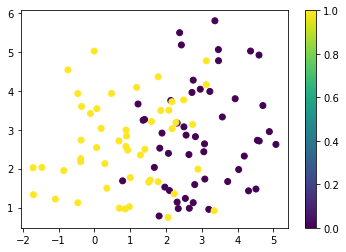

In [11]:
plt.scatter(X_old[:,0],X_old[:,1], c = y)
plt.colorbar()

Using X_old = X instead of X_old = np.copy(X) results in no distinction between the two.

### D2. Moons

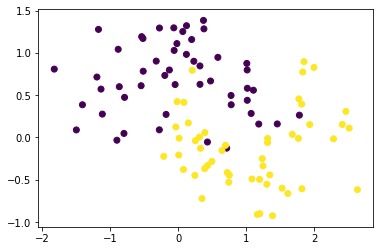

In [12]:
X,y = make_moons(noise=0.3, random_state=10)
plt.scatter(X[:,0],X[:,1], c = y)

### E2. What happens to the make_moons data if you change the noise and random state? Why do you think they picked noise = 0.3?

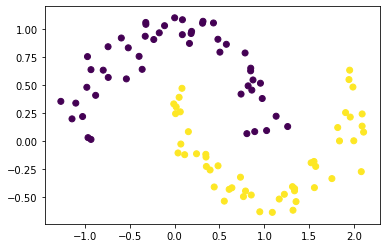

In [13]:
X,y = make_moons(noise=0.1, random_state=10) #altering noise of make_moons data
plt.scatter(X[:,0],X[:,1], c = y)

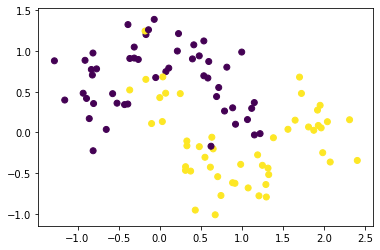

In [14]:
X,y = make_moons(noise=0.3, random_state=20) #altering random state of make_moons data
plt.scatter(X[:,0],X[:,1], c = y)

By changing the noise and state of the make_moons data you affect how your plots are distributed? You can make them closer or farther apart from eachother.

### D3 Circles

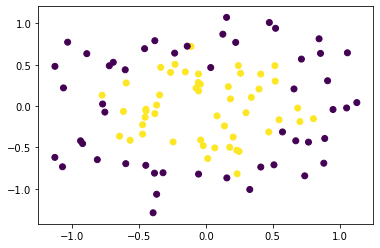

In [15]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

### E2. Play around with the options for make_circles. What does factor do?

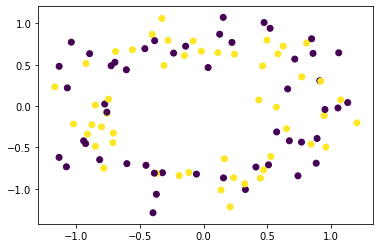

In [16]:
# make some data to play with (this is from sklearn.datasets, loaded above) #messing around with factor
X, y = make_circles(noise=0.2, factor=0.9, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

Factor affects how close together the points are especially seen in the yellow points.

In [17]:
# put the three types of datasets together in one array
datasets = [make_circles(noise=0.2, factor=0.5)]

## Part 2: Big double for loop

The next part of the code has a double for loop that:

    Loops over the datasets
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
    
        Loops over the classifiers
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
        
        
Let's break this down, and start with one dataset and apply a number of classifiers to it

### Using first dataset (moons) and first estimator

#### FIrst we preproccess
preprocess dataset, split into training and test part

scale the data

In [18]:
# get the first dataset, which is moons
X, y = datasets[0]

# scale the data by the mean and standard deviation, i.e. z = (x - u) / s, 
# where x is the data, u is the mean, and s is the standard deviation
# see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X = StandardScaler().fit_transform(X)


## E3 make a plot with two subplots, showing the scaled and unscaled data next to each other. How are they different?

In [46]:
#scale
Xscale_train, Xscale_test, yscale_train, yscale_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

In [47]:
# split the data into training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)


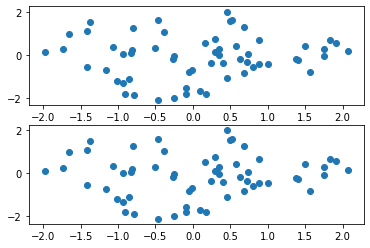

In [48]:
plt.subplot(211)
plt.scatter(Xscale_train[:, 0], Xscale_train[:,1])

plt.subplot(212)
plt.scatter(X_train[:, 0], X_train[:,1])

In [20]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [16]:
X_train

array([[ 0.30920485, -0.127041  ],
       [-0.48691402,  0.57259859],
       [ 0.50954902, -1.66427178],
       [ 1.35242892,  0.60859541],
       [ 1.89600064, -0.42653506],
       [ 0.74779523,  0.54957438],
       [-1.19805934,  1.40047603],
       [-1.4065875 , -1.03687185],
       [-0.33075371, -0.55325533],
       [ 0.81773837,  1.64300265],
       [-1.30667592, -0.60711187],
       [-0.62663858, -0.45097084],
       [-0.22120141,  1.00868763],
       [-0.85151619, -0.06022663],
       [-0.59739923,  0.27829883],
       [ 0.15581821, -1.14573741],
       [ 0.07813527,  0.18433247],
       [ 0.24130156, -1.74371889],
       [-0.42443599,  1.30854456],
       [ 0.0081454 , -0.58656254],
       [ 0.03138162,  1.27867747],
       [-2.02716273, -0.07552655],
       [-0.20216417,  0.09829492],
       [-1.77093289, -0.15602456],
       [ 1.01975478, -0.39964896],
       [ 1.22467352, -1.45537741],
       [ 0.19895122,  2.27694191],
       [ 0.27524467,  0.58976897],
       [-0.9843448 ,

## E4 What percentage of the data is used for training here?

60% of the data is used for training while 40% is used for testing

### plot the data

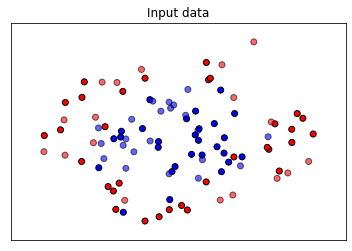

In [21]:
#######
# set up a meshgrid for plotting the classification result based on the size of the dataset
# note this will be used later
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#######

# counter for which subplot we are in
i = 1

# this counter is used to know when to plot the title
ds_cnt = 0

# just plot the dataset first

# note this is not used yet
cm = plt.cm.RdBu

# set the colormap used for the data 
# see https://matplotlib.org/tutorials/colors/colorbar_only.html#sphx-glr-tutorials-colors-colorbar-only-py
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1,1, i)
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

# if the first row, plot the title
if ds_cnt == 0:
    ax.set_title("Input data")
    
# Plot the training points using the bright colormap
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

# set the limits to the colormap min max we will use later
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# get rid of ticks
ax.set_xticks(())
ax.set_yticks(())

# increment to go to the next subplot
i += 1


Note the testing data is the more transparent set, and the training data is darker

Now we are ready to apply classifiers

Remember we are doing the following:

classifiers = [

    KNeighborsClassifier(3),
    
    SVC(kernel="linear", C=0.025),
    
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    
    DecisionTreeClassifier(max_depth=5),
    
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    
    MLPClassifier(alpha=1),
    
    AdaBoostClassifier(),
    
    GaussianNB(),
    
    QuadraticDiscriminantAnalysis()]

## Nearest neighbors
Basically this method looks at k number of nearest neighbors, using some distance metric, and predicts which class a point is in based on the type of thing those neighbors are.

intro https://www.python-course.eu/k_nearest_neighbor_classifier.php

see https://scikit-learn.org/stable/modules/neighbors.html

and https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

actual help files:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [18]:
# get the first classifier, KNeighborsClassifier(3)
# here we are using 3 nearest neighbors

# index for classifier
c = 0

name = names[0]
clf = classifiers[0]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


In [19]:
name

'Nearest Neighbors'

In [20]:
clf

# weights = 'uniform' here means we are not weighting by distance
# p=2 is using Euclidean (standard) distance

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
score

0.975

Next we will plot the decision boundary using the mesh we generated. Basically this is asking, for each point on the plane, which group would I be in, red or blue?

In [22]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

## E5 what does the xx.ravel() bit of code do?

Predict the function value for the whole grid?

Note that kneighbors does not have a decision_function, so we are using predict_proba. This is the probability that each point in the meshgrid is in either the red class (zeros) or the blue class (ones)

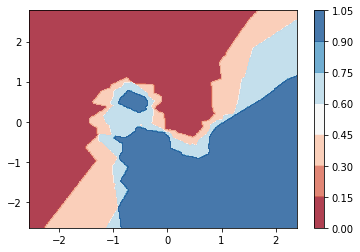

In [23]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

## E6 what do the light blue and peach colors represent?


The expected red and blue contour plot

Now we will add in the training and testing points, and see how well the method did to predict the latter

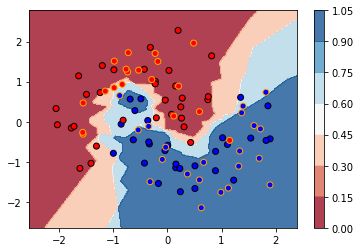

In [24]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

## E7 How well did the method do? Are there outliers in either class? Is it reasonable that this method did not predict those, given the training dataset?

I would say that it wasn't the best, but it also wasn't the worst. There are outliers in either class. It is reasonable that this method did not predict those. How do we expect it to know there was red in the blue when we didn't train it with red.

## E8 Using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.

In [35]:
# get the first classifier, KNeighborsClassifier(3)
# here we are using 3 nearest neighbors

# index for classifier
c = 0

name = names[4]
clf = classifiers[4]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)



In [36]:
name

'Decision Tree'

In [38]:
clf

# weights = 'uniform' here means we are not weighting by distance
# p=2 is using Euclidean (standard) distance

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
score

0.825

In [40]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

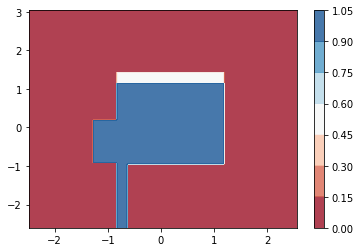

In [41]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

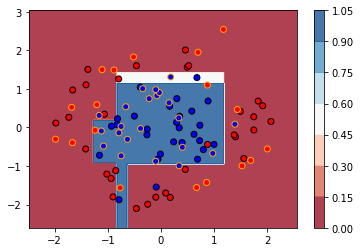

In [42]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

## E9 (Advanced) Again, using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.

In [30]:
#RBF SVM, moons dataset

In [23]:
# get the first classifier, KNeighborsClassifier(3)
# here we are using 3 nearest neighbors

# index for classifier
c = 0

name = names[2]
clf = classifiers[2]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


In [24]:
name

'RBF SVM'

In [25]:
clf

# weights = 'uniform' here means we are not weighting by distance
# p=2 is using Euclidean (standard) distance

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [26]:
score

0.875

In [27]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

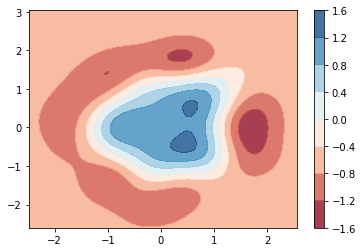

In [28]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

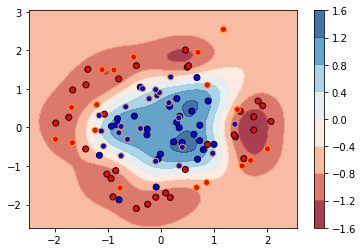

In [29]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

## Notes on clustering vs. classification

Note that clustering is similar, but we don't have the y data, i.e. red/blue or any type of class assignemnt in the data itself, just locations in some variable space (could be lat/lon, or could be something way more abstract, like frequency vs. intensity space for sound data).

Here is a clustering example, similar to what we did above:
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py